In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


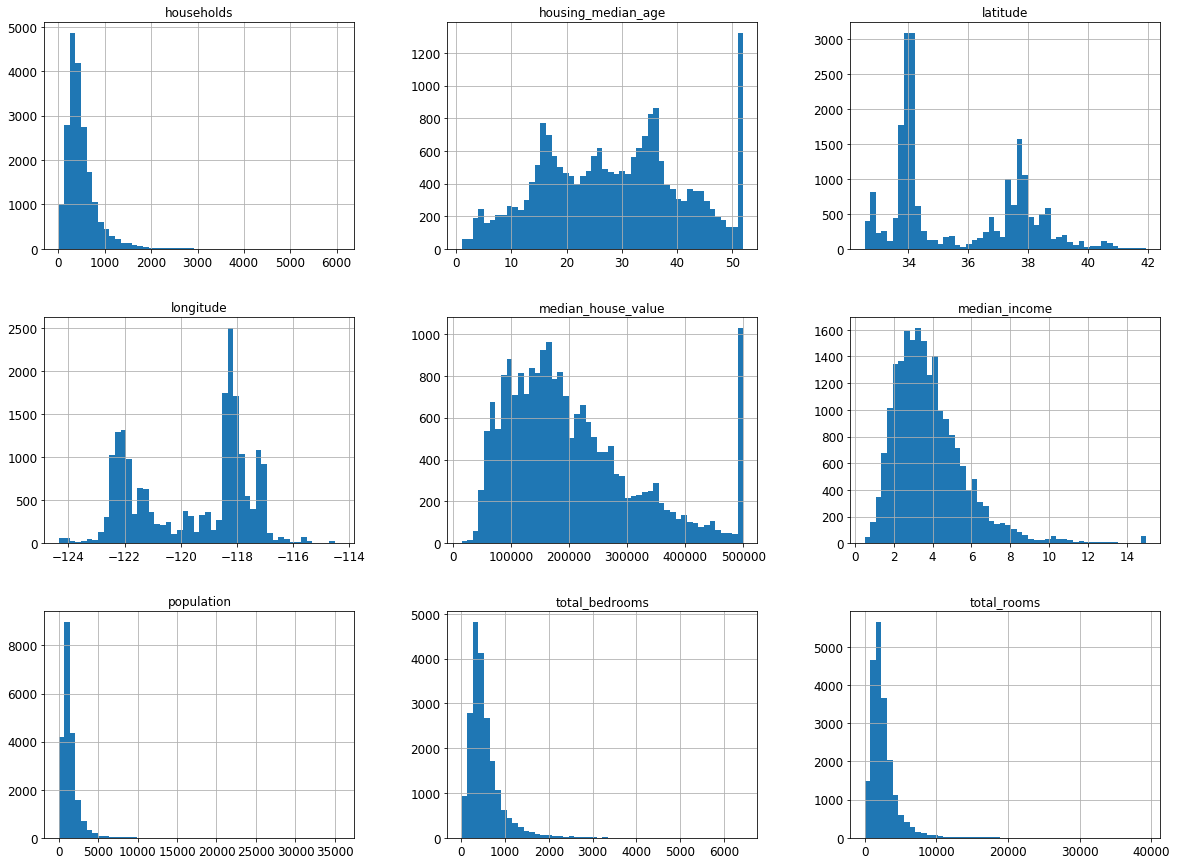

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

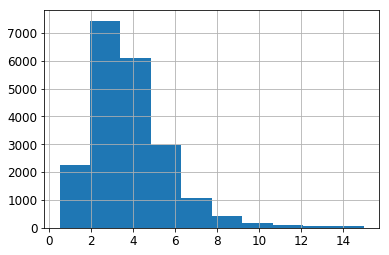

In [10]:
housing['median_income'].hist()

In [11]:
housing['median_income'].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
3.8750     41
3.0000     38
3.3750     38
3.6250     37
4.0000     37
4.3750     35
2.1250     33
2.3750     32
4.6250     31
3.5000     30
3.2500     29
3.7500     29
4.8750     29
1.6250     29
2.2500     29
4.2500     28
2.5000     28
3.6875     26
2.7500     25
4.5000     24
2.5625     21
1.8750     21
5.0000     20
3.0625     19
4.4375     18
           ..
5.7780      1
1.3672      1
4.6420      1
2.5389      1
6.2113      1
2.1975      1
6.0591      1
2.1403      1
1.5161      1
4.0037      1
1.9306      1
4.0517      1
3.5082      1
5.2649      1
6.7744      1
4.0677      1
2.1216      1
4.1449      1
6.0808      1
5.6263      1
4.8283      1
2.5599      1
7.3031      1
2.7209      1
2.1630      1
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

In [12]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [13]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    s_train = housing.loc[train_index]
    s_test = housing.loc[test_index]

In [15]:
s_train['income_cat'].value_counts() / len(s_train)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [16]:
s_test['income_cat'].value_counts() / len(s_test)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

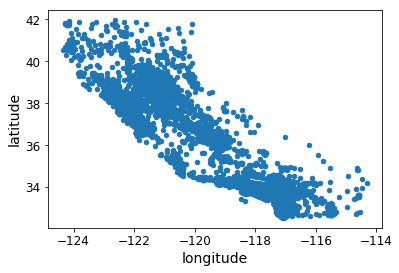

In [17]:
s_train.plot(kind='scatter',x='longitude',y='latitude')

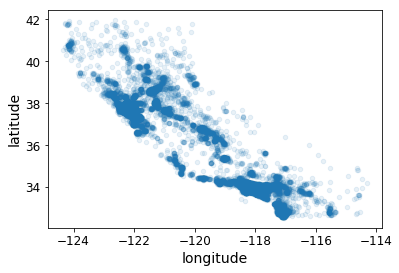

In [18]:
s_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
# save_fig("better_visualization_plot")

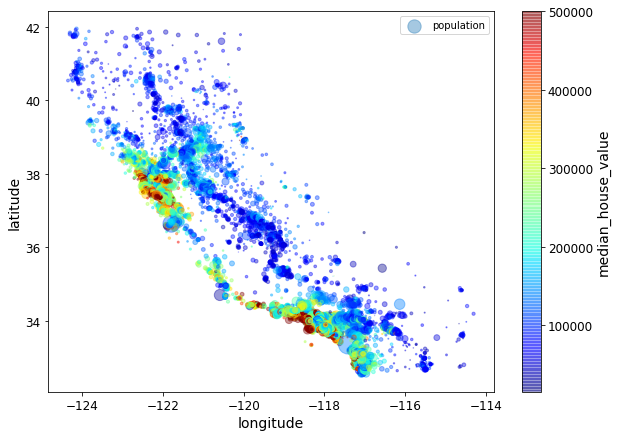

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value",sharex=False,cmap=plt.get_cmap('jet'))

In [20]:
s_train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12213a588>,
      dtype=object)

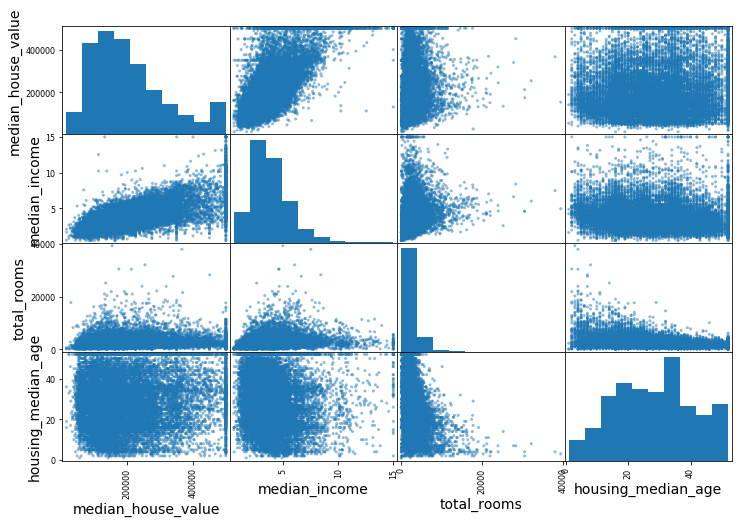

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(s_train[attributes], figsize=(12, 8))

[0, 16, 0, 550000]

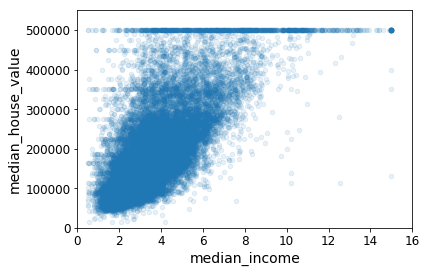

In [22]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [23]:
s_train = housing

In [24]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [25]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

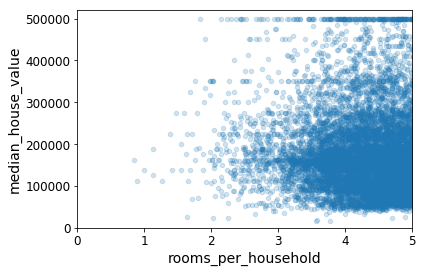

In [26]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [27]:
housing = s_train.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = s_train["median_house_value"].copy()

In [28]:
from sklearn.preprocessing import Imputer as SimpleImputer
imputer = SimpleImputer(strategy="median")

/Users/liuyang/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
housing_num = housing.select_dtypes(include=[np.number])

In [30]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [31]:
X = imputer.transform(housing_num)

In [32]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=list(housing.index.values))

In [33]:
housing_cat = housing[['ocean_proximity']]

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [37]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [38]:
from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

In [43]:
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
        population_per_household = X[:,population_ix] / X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [44]:
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household
0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY,5,6.98413,0.146591,2.55556,6.98413,2.55556
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY,5,6.23814,0.155797,2.10984,6.23814,2.10984
2,-122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY,5,8.28814,0.129516,2.80226,8.28814,2.80226
3,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY,4,5.81735,0.184458,2.54795,5.81735,2.54795
4,-122.25,37.85,52,1627,280,565,259,3.8462,NEAR BAY,3,6.28185,0.172096,2.18147,6.28185,2.18147


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder(add_bedrooms_per_room=False)),
    ('std_scaler',StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

/Users/liuyang/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [48]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [50]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

/Users/liuyang/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67884.30647749316

In [53]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

48997.215153460595

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [55]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [62]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [67]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [118973.81617535  70399.67742277  83110.60861532  74483.67444453
  88655.8705235   80579.94150006  68725.56121883 100112.07785008
  94276.06542845  71798.30825809]
Mean: 85111.56014369866
Standard deviation: 15059.524119009637


In [68]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [8.33224541e+04 5.89202713e+04 8.54477338e+04 6.19963670e+04
 3.68142168e+14 6.88910394e+04 5.26538198e+04 8.97487486e+04
 7.76211824e+04 5.39613310e+04]
Mean: 36814216870782.66
Standard deviation: 110442650401493.67


In [69]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [70]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21821.89676009136

In [71]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [98263.05811895 50500.39715714 68096.85248611 58564.18339111
 63639.43973421 63342.27647639 48762.72563891 82365.5468256
 75912.69874564 51854.98162678]
Mean: 66130.21602008537
Standard deviation: 14888.233054801656


In [72]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

108773.31775397823

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_red = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_red,param_grid,scoring='neg_mean_squared_error',return_train_score=True,cv=5)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [77]:
cvres = grid_search.cv_results_

for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

81229.46425756531 {'max_features': 2, 'n_estimators': 3}
73554.38203168877 {'max_features': 2, 'n_estimators': 10}
69492.19077677913 {'max_features': 2, 'n_estimators': 30}
79956.47105927345 {'max_features': 4, 'n_estimators': 3}
71896.41451013919 {'max_features': 4, 'n_estimators': 10}
68192.73054615836 {'max_features': 4, 'n_estimators': 30}
79434.45037906662 {'max_features': 6, 'n_estimators': 3}
70426.25394323422 {'max_features': 6, 'n_estimators': 10}
67638.69913873295 {'max_features': 6, 'n_estimators': 30}
75898.31523210382 {'max_features': 8, 'n_estimators': 3}
70372.33000724706 {'max_features': 8, 'n_estimators': 10}
67879.73609622502 {'max_features': 8, 'n_estimators': 30}
78153.68050827597 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
73467.39094975914 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
81207.79025400661 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
73208.53822880214 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators':randint(low=1,high=200),
    'max_features':randint(low=1,high=8)
}
rnd_search = RandomizedSearchCV(forest_reg,param_distribs,cv=5,scoring='neg_mean_squared_error')
rnd_search.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a27f91c18>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a27f91828>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [80]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

67300.42589724083 {'max_features': 4, 'n_estimators': 93}
67573.02080825817 {'max_features': 7, 'n_estimators': 107}
68679.3597532361 {'max_features': 5, 'n_estimators': 21}
67598.6442169133 {'max_features': 7, 'n_estimators': 122}
68130.64807721713 {'max_features': 3, 'n_estimators': 75}
68051.21764428297 {'max_features': 3, 'n_estimators': 88}
67266.98704857631 {'max_features': 5, 'n_estimators': 100}
67767.60395551076 {'max_features': 3, 'n_estimators': 150}
82892.06808863916 {'max_features': 5, 'n_estimators': 2}
67394.92078818791 {'max_features': 4, 'n_estimators': 158}


In [81]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.18314790e-02, 7.04556880e-02, 3.90535474e-02, 1.44140263e-02,
       1.36866897e-02, 1.44864393e-02, 1.40085426e-02, 2.88696901e-01,
       4.55745719e-02, 9.86391110e-02, 6.59777127e-02, 3.46828289e-02,
       6.48453833e-02, 1.19905711e-02, 1.44289153e-01, 9.00044743e-05,
       2.42446615e-03, 4.85288452e-03])

In [85]:
full_pipeline.named_transformers_['cat'].categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [90]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
one_hot_attribs = full_pipeline.named_transformers_['cat'].categories_[0]
attributes = num_attribs + extra_attribs + list(one_hot_attribs)
sorted(zip(feature_importances,attributes),reverse=True)

[(0.2886969006405718, 'median_income'),
 (0.14428915298600606, '<1H OCEAN'),
 (0.09863911100319865, 'bedrooms_per_room'),
 (0.07183147897380307, 'longitude'),
 (0.07045568799166328, 'latitude'),
 (0.06597771269889854, 'population_per_household'),
 (0.06484538332597789, 'pop_per_hhold'),
 (0.045574571858026304, 'rooms_per_household'),
 (0.039053547425042946, 'housing_median_age'),
 (0.03468282890014376, 'rooms_per_hhold'),
 (0.014486439325091947, 'population'),
 (0.014414026310867545, 'total_rooms'),
 (0.014008542649702974, 'households'),
 (0.013686689697943281, 'total_bedrooms'),
 (0.011990571068598957, 'bedrooms_per_room'),
 (0.004852884516935936, 'NEAR BAY'),
 (0.0024244661532622012, 'ISLAND'),
 (9.000447426482999e-05, 'INLAND')]

In [89]:
one_hot_attribs

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [92]:
final_model = grid_search.best_estimator_

X_test = s_test.drop("median_house_value", axis=1)
y_test = s_test["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

/Users/liuyang/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [93]:
final_rmse

47570.335443824515

# We can compute a 95% confidence interval for the test RMSE:

In [94]:
from scipy import stats

In [95]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)
np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([45741.95982709, 49330.99167514])

### We could compute the interval manually like this:

In [96]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45741.95982709337, 49330.991675137804)

In [97]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45742.506763132216, 49330.48452529877)

### Example SciPy distributions for RandomizedSearchCV

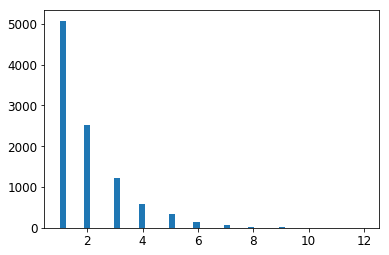

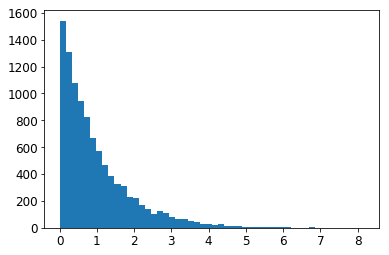

In [98]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

## Try replacing GridSearchCV with RandomizedSearchCV.

In [100]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=-1, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'kernel': ['linear', 'rbf'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a30073d30>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a300734a8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [101]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

65152.79092916993

In [102]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

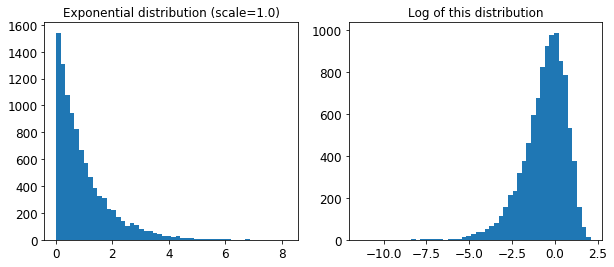

In [103]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

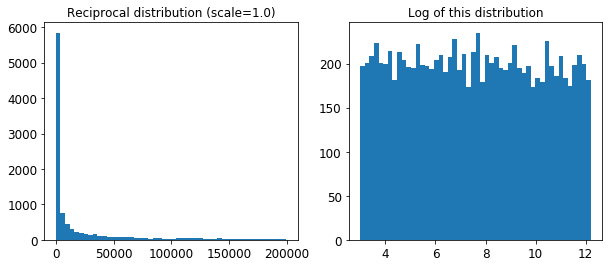

In [104]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

### Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [105]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

In [106]:
class TopFeatureSelector(BaseEstimator,TransformerMixin):
    def __init__(self,feature_importances,k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self,X,y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances,self.k)
        return self
    def transform(self,X):
        return X[:,self.feature_indices_]

In [107]:
top_5 = indices_of_top_k(feature_importances,5)
top_5

array([ 0,  1,  7,  9, 14])

In [109]:
np.array(attributes)[top_5]

array(['longitude', 'latitude', 'median_income', 'bedrooms_per_room',
       '<1H OCEAN'], dtype='<U24')

In [110]:
sorted(zip(feature_importances,attributes),reverse=True)[:5]

[(0.2886969006405718, 'median_income'),
 (0.14428915298600606, '<1H OCEAN'),
 (0.09863911100319865, 'bedrooms_per_room'),
 (0.07183147897380307, 'longitude'),
 (0.07045568799166328, 'latitude')]

In [112]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, 5))
])

In [113]:
housing_top_5 = preparation_and_feature_selection_pipeline.fit_transform(housing)

/Users/liuyang/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [118]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

In [120]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, 5)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [121]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

/Users/liuyang/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Pipeline(memory=None,
     steps=[('preparation', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('attribs_add... gamma=0.26497040005002437, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

In [122]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [442801.56889734 440356.10385932 392071.00140306 281937.34224944]
Labels:		 [452600.0, 358500.0, 352100.0, 341300.0]
